## Make a plot of the mean absolute and geostrophic velocity from the 2020 and 2022 deployments

In [3]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np
import glob
import datetime
import xarray as xr
import cmocean.cm as cmo

myFmtshort = mdates.DateFormatter('%m/%d\n%H:%M')
myFmtlong = mdates.DateFormatter('%y/%m/%d\n%H:%M')
myFmt = mdates.DateFormatter('%m/%d/%y')

## Load data

In [103]:
## These were created in 04_Slocum_AD2CP_Analysis_RU29_2020.ipynb

geo_grid_2020 = xr.open_dataset("/home/jg1200/Data/RU29_2020_Gridded_Geostrophic_Velocity.nc")
abs_grid_2020 = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2020_AD2CP_NC/Gridded/RU29_2020_Gridded_ADCP_CTD.nc")

## These were created in RU36_2022_03_Mission_Transport_Calculations.ipynb and RU36_2022_03_Mission.ipynb
#geo_grid_2022 = xr.open_dataset("/home/jg1200/Data/GliderData/RU36/RU36_03_2022_ADCP/RU36_03_2022_Gridded_Geostrophic_Velocity.nc")
geo_grid_2022 = xr.open_dataset("/home/jg1200/Data/GliderData/RU36/RU36_03_2022_Gridded_Geostrophic_Velocity.nc")

abs_grid_2022 = xr.open_dataset("/home/jg1200/Data/GliderData/RU36/RU36_03_2022_ADCP/RU26_03_2022_Gridded_ADCP_CTD.nc")



In [104]:
geo_grid_2020

<xarray.Dataset>
Dimensions:       (depth: 501, lat: 6, transect_num: 15)
Coordinates:
  * depth         (depth) int64 0 2 4 6 8 10 12 ... 988 990 992 994 996 998 1000
  * lat           (lat) float64 17.85 17.9 17.95 18.0 18.05 18.1
  * transect_num  (transect_num) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    u             (depth, lat, transect_num) float64 ...
    density       (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 ...
    salinity      (depth, lat, transect_num) float64 ...
Attributes:
    description:  Processed RU29 Geostrophic Velocity and T/S/Density from th...

In [105]:
abs_grid_2020

<xarray.Dataset>
Dimensions:       (depth: 99, lat: 8, transect_num: 15)
Coordinates:
  * depth         (depth) float64 5.0 15.0 25.0 35.0 ... 955.0 965.0 975.0 985.0
  * lat           (lat) float64 17.8 17.85 17.9 17.95 18.0 18.05 18.1 18.15
  * transect_num  (transect_num) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    u             (depth, lat, transect_num) float64 ...
    v             (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 ...
    sal           (depth, lat, transect_num) float64 ...
    density       (depth, lat, transect_num) float64 ...
    time          (lat, transect_num) datetime64[ns] ...
Attributes:
    description:  Processed RU29 AD2CP and CTD data from the 2020 Deployment....

In [106]:
geo_grid_2022

<xarray.Dataset>
Dimensions:       (depth: 501, lat: 4, transect_num: 6)
Coordinates:
  * depth         (depth) int64 0 2 4 6 8 10 12 ... 988 990 992 994 996 998 1000
  * lat           (lat) float64 17.8 17.9 18.0 18.1
  * transect_num  (transect_num) int64 1 2 3 4 5 6
Data variables:
    u             (depth, lat, transect_num) float64 ...
    density       (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 ...
    salinity      (depth, lat, transect_num) float64 ...
Attributes:
    description:  Processed RU36 Geostrophic Velocity and T/S/Density from th...

In [107]:
abs_grid_2022

<xarray.Dataset>
Dimensions:       (depth: 101, lat: 8, transect_num: 8)
Coordinates:
  * depth         (depth) float64 5.0 15.0 25.0 35.0 ... 985.0 995.0 1.005e+03
  * lat           (lat) float64 17.8 17.85 17.9 17.95 18.0 18.05 18.1 18.15
  * transect_num  (transect_num) int64 1 2 3 4 5 6 7 8
Data variables:
    u             (depth, lat, transect_num) float64 ...
    v             (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 ...
    sal           (depth, lat, transect_num) float64 ...
    density       (depth, lat, transect_num) float64 ...
    time          (lat, transect_num) datetime64[ns] ...
Attributes:
    description:  Processed RU36 ADCP and CTD data from the March 2022 Deploy...

In [108]:
#### NEED TO SUBSET abs_grid_2022 to transects 2-7 like geo
abs_grid_2022 = abs_grid_2022.sel(transect_num=slice(2,7))
abs_grid_2022

<xarray.Dataset>
Dimensions:       (depth: 101, lat: 8, transect_num: 6)
Coordinates:
  * depth         (depth) float64 5.0 15.0 25.0 35.0 ... 985.0 995.0 1.005e+03
  * lat           (lat) float64 17.8 17.85 17.9 17.95 18.0 18.05 18.1 18.15
  * transect_num  (transect_num) int64 2 3 4 5 6 7
Data variables:
    u             (depth, lat, transect_num) float64 0.069 -0.08234 ... nan nan
    v             (depth, lat, transect_num) float64 -0.1054 0.2119 ... nan nan
    temp          (depth, lat, transect_num) float64 26.31 26.39 ... 9.969e+36
    sal           (depth, lat, transect_num) float64 35.91 35.92 ... 9.969e+36
    density       (depth, lat, transect_num) float64 1.024e+03 ... 9.969e+36
    time          (lat, transect_num) datetime64[ns] 2022-03-01T03:51:23 ... ...
Attributes:
    description:  Processed RU36 ADCP and CTD data from the March 2022 Deploy...

## Plot 'er up!

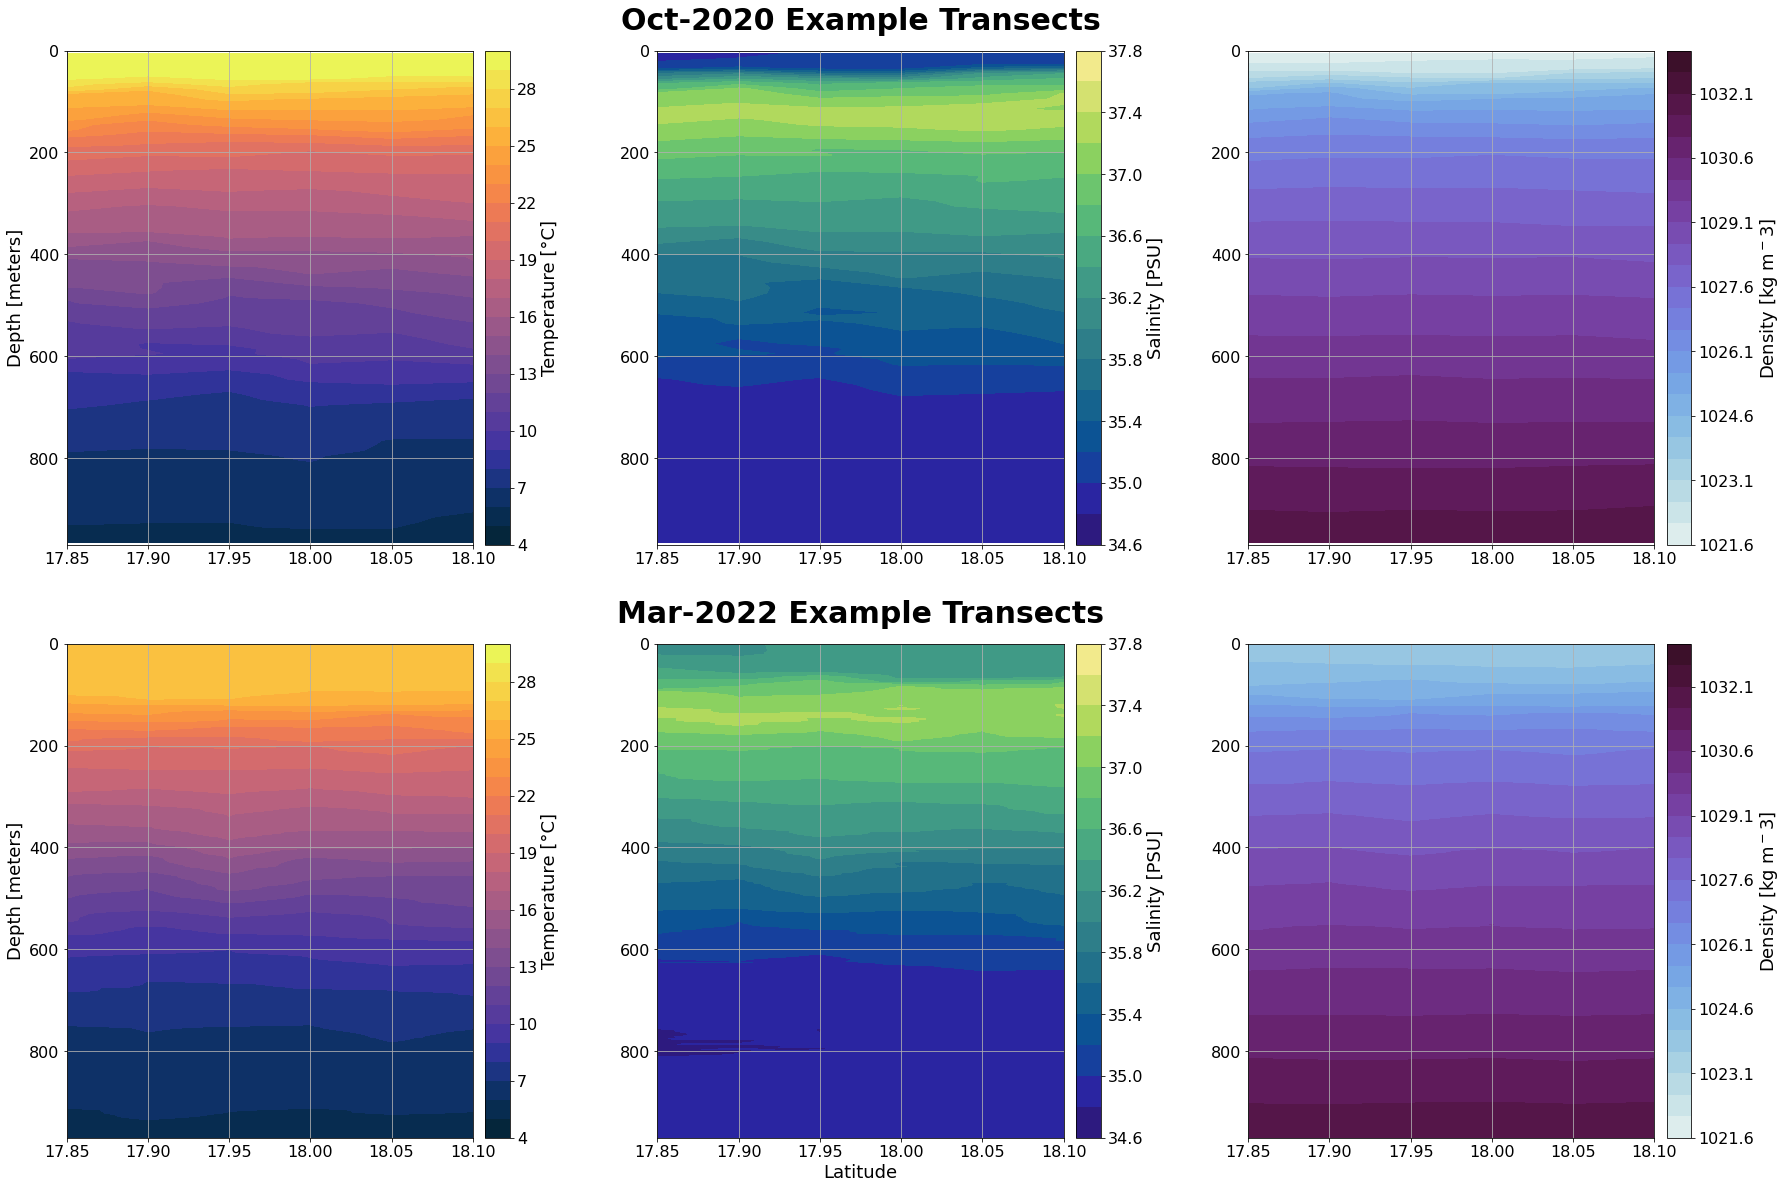

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(30, 20))

t_vmin=4
t_vmax=30
t_range= np.arange(t_vmin,t_vmax+0.5,1)

s_vmin=34.6
s_vmax=37.4
s_range= np.arange(s_vmin,s_vmax+0.5,0.2)


d_vmin=1021.6
d_vmax=1032.8
d_range= np.arange(d_vmin,d_vmax+0.5,0.5)

x_ticks = np.arange(17.85,18.11,0.05)
y_ticks = np.arange(0,1000,200)



im = axs[0,0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,abs_grid_2020.temp[:,:,1],cmap=cmo.thermal,levels=t_range)
axs[0,0].set_xlim(17.85,18.1)
axs[0,0].set_ylim(970,0)
axs[0,0].set_xticks(x_ticks)
axs[0,0].set_yticks(y_ticks)
axs[0,0].grid()
axs[0,0].set_ylabel('Depth [meters]',fontsize=18)
axs[0,0].tick_params(axis='both', which='major', labelsize=16)
clb = plt.colorbar(im, ax=axs[0,0],pad=0.025)
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='Temperature [°C]',fontsize=18)

im = axs[0,1].contourf(abs_grid_2020.lat,abs_grid_2020.depth,abs_grid_2020.sal[:,:,1],cmap=cmo.haline,levels=s_range)
axs[0,1].set_xlim(17.85,18.1)
axs[0,1].set_ylim(970,0)
axs[0,1].set_xticks(x_ticks)
axs[0,1].set_yticks(y_ticks)
axs[0,1].grid()
axs[0,1].tick_params(axis='both', which='major', labelsize=16)
clb = plt.colorbar(im, ax=axs[0,1],pad=0.025)
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='Salinity [PSU]',fontsize=18)
axs[0,1].set_title('Oct-2020 Example Transects',fontsize=30,weight='bold',y=1.03)

im = axs[0,2].contourf(abs_grid_2020.lat,abs_grid_2020.depth,abs_grid_2020.density[:,:,1],cmap=cmo.dense,levels=d_range)
axs[0,2].set_xlim(17.85,18.1)
axs[0,2].set_ylim(970,0)
axs[0,2].set_xticks(x_ticks)
axs[0,2].set_yticks(y_ticks)
axs[0,2].grid()
axs[0,2].tick_params(axis='both', which='major', labelsize=16)
clb = plt.colorbar(im, ax=axs[0,2],pad=0.025)
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='Density [kg m$^-3$]',fontsize=18)


im = axs[1,0].contourf(geo_grid_2022.lat,geo_grid_2022.depth,geo_grid_2022.temp[:,:,4],cmap=cmo.thermal,levels=t_range)
axs[1,0].set_ylim(970,0)
axs[1,0].set_xticks(x_ticks)
axs[1,0].set_yticks(y_ticks)
axs[1,0].grid()
axs[1,0].set_ylabel('Depth [meters]',fontsize=18)
axs[1,0].tick_params(axis='both', which='major', labelsize=16)
clb = plt.colorbar(im, ax=axs[1,0],pad=0.025)
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='Temperature [°C]',fontsize=18)

im = axs[1,1].contourf(geo_grid_2022.lat,geo_grid_2022.depth,geo_grid_2022.salinity[:,:,4],cmap=cmo.haline,levels=s_range)
axs[1,1].set_ylim(970,0)
axs[1,1].set_xticks(x_ticks)
axs[1,1].set_yticks(y_ticks)
axs[1,1].grid()
axs[1,1].set_xlabel('Latitude', fontsize=18)
axs[1,1].tick_params(axis='both', which='major', labelsize=16)
clb = plt.colorbar(im, ax=axs[1,1],pad=0.025)
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='Salinity [PSU]',fontsize=18)
axs[1,1].set_title('Mar-2022 Example Transects',fontsize=30,weight='bold',y=1.03)

im = axs[1,2].contourf(geo_grid_2022.lat,geo_grid_2022.depth,geo_grid_2022.density[:,:,4],cmap=cmo.dense,levels=d_range)
axs[1,2].set_ylim(970,0)
axs[1,2].set_xticks(x_ticks)
axs[1,2].set_yticks(y_ticks)
axs[1,2].grid()
axs[1,2].tick_params(axis='both', which='major', labelsize=16)
clb = plt.colorbar(im, ax=axs[1,2],pad=0.025)
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='Density [kg m$^-3$]',fontsize=18)


plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_Example_Transect_Temp_Salinty_Density.png', bbox_inches='tight',dpi=300,facecolor='white')


/tmp/ipykernel_43526/99243340.py:16: RuntimeWarning: Mean of empty slice
  im = axs[0,0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,np.nanmean(abs_grid_2020.u,axis=2),cmap='RdBu',levels=v_range_geo)
/tmp/ipykernel_43526/99243340.py:46: RuntimeWarning: Mean of empty slice
  im = axs[1,0].contourf(abs_grid_2022.lat,abs_grid_2022.depth,np.nanmean(abs_grid_2022.u,axis=2),cmap='RdBu',levels=v_range_geo)


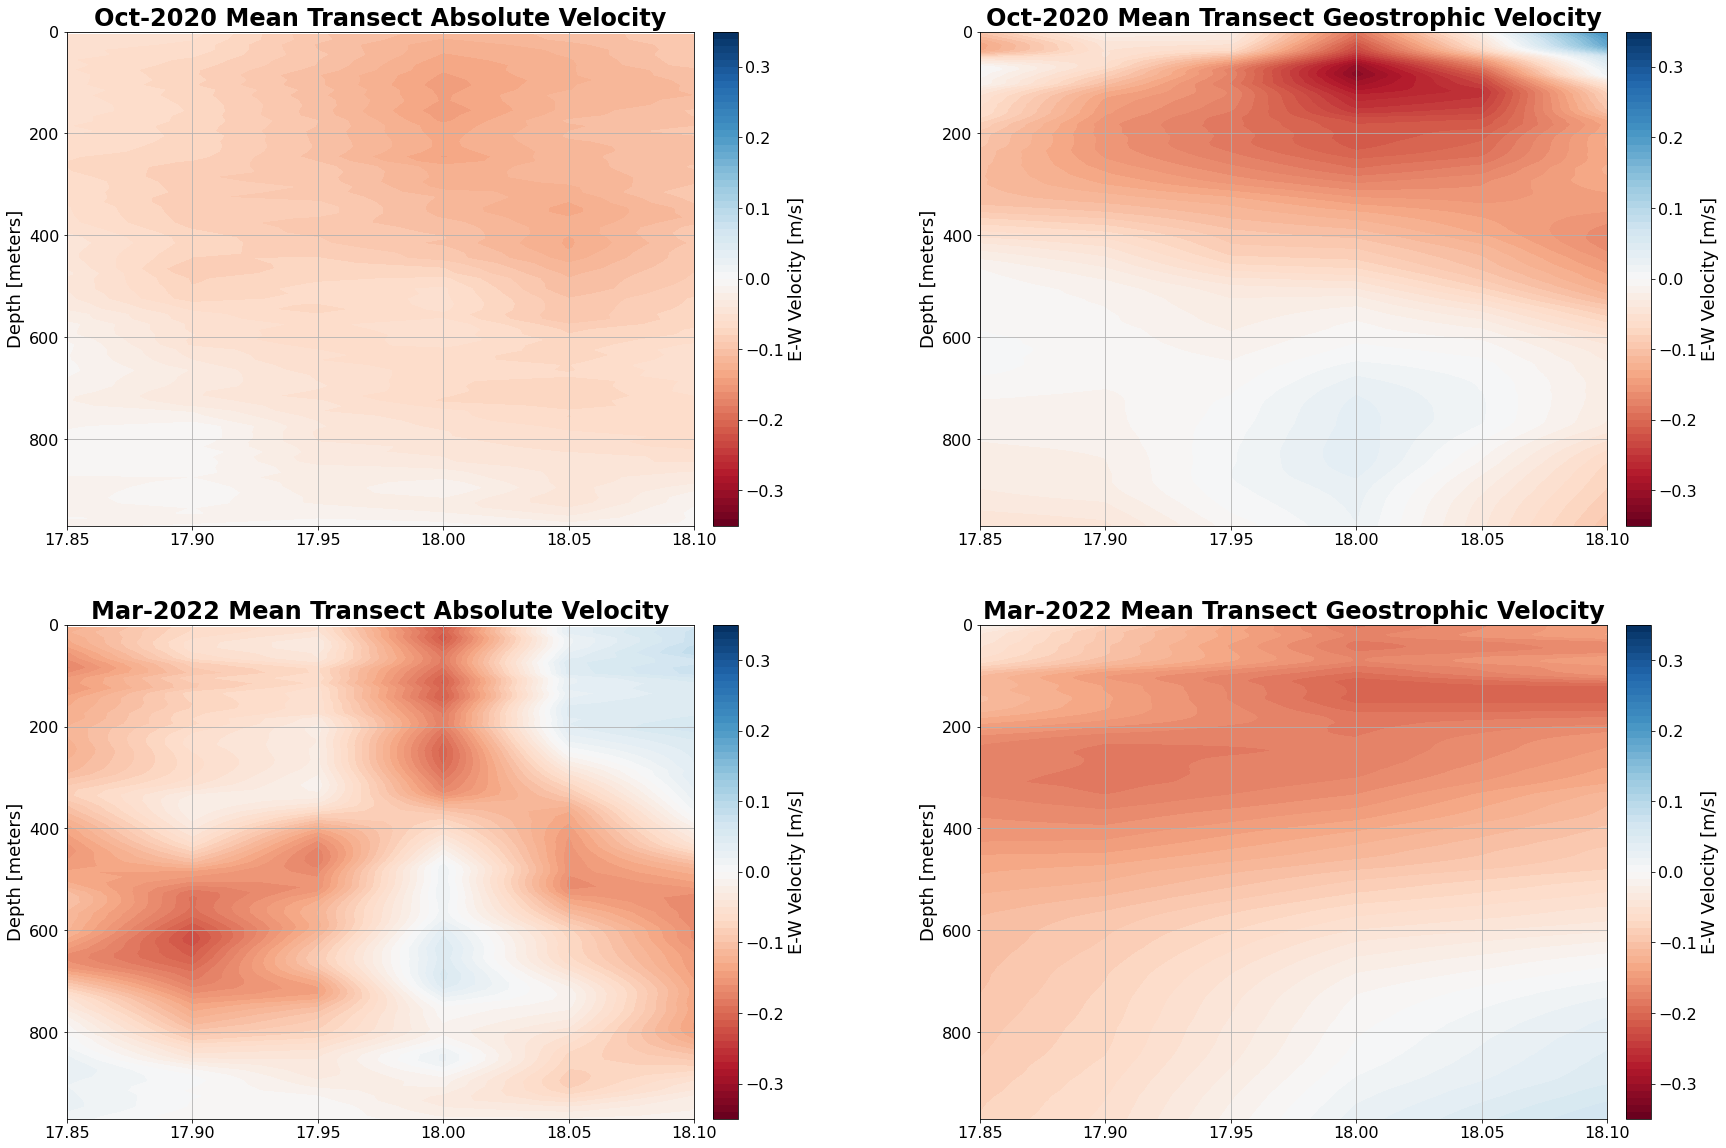

In [129]:
fig, axs = plt.subplots(2, 2, figsize=(30, 20))

v_vmin_geo  = -0.35
v_vmax_geo  = 0.35
v_range_geo = np.arange(v_vmin_geo,v_vmax_geo+0.0001,0.01)

# v_vmin_abs  = -0.2
# v_vmax_abs  = 0
# v_range_abs = np.arange(v_vmin_abs,v_vmax_abs+0.01,0.012)


x_ticks = np.arange(17.85,18.11,0.05)
y_ticks = np.arange(0,1000,200)


im = axs[0,0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,np.nanmean(abs_grid_2020.u,axis=2),cmap='RdBu',levels=v_range_geo)
axs[0,0].set_xlim(17.85,18.1)
axs[0,0].set_ylim(970,0)
axs[0,0].set_xticks(x_ticks)
axs[0,0].set_yticks(y_ticks)
axs[0,0].grid()
axs[0,0].set_ylabel('Depth [meters]',fontsize=18)
axs[0,0].tick_params(axis='both', which='major', labelsize=16)
axs[0,0].set_title('Oct-2020 Mean Transect Absolute Velocity',fontsize=24,weight='bold')
clb = plt.colorbar(im, ax=axs[0,0],pad=0.025,ticks=[-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='E-W Velocity [m/s]',fontsize=18)



im = axs[0,1].contourf(geo_grid_2020.lat,geo_grid_2020.depth,np.nanmean(geo_grid_2020.u,axis=2),cmap='RdBu',levels=v_range_geo)
axs[0,1].set_xlim(17.85,18.1)
axs[0,1].set_ylim(970,0)
axs[0,1].set_xticks(x_ticks)
axs[0,1].set_yticks(y_ticks)
axs[0,1].grid()
axs[0,1].set_ylabel('Depth [meters]',fontsize=18)
axs[0,1].tick_params(axis='both', which='major', labelsize=16)
axs[0,1].set_title('Oct-2020 Mean Transect Geostrophic Velocity',fontsize=24,weight='bold')
clb = plt.colorbar(im, ax=axs[0,1],pad=0.025,ticks=[-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='E-W Velocity [m/s]',fontsize=18)



im = axs[1,0].contourf(abs_grid_2022.lat,abs_grid_2022.depth,np.nanmean(abs_grid_2022.u,axis=2),cmap='RdBu',levels=v_range_geo)
axs[1,0].set_xlim(17.85,18.1)
axs[1,0].set_ylim(970,0)
axs[1,0].set_xticks(x_ticks)
axs[1,0].set_yticks(y_ticks)
axs[1,0].grid()
axs[1,0].set_ylabel('Depth [meters]',fontsize=18)
axs[1,0].tick_params(axis='both', which='major', labelsize=16)
axs[1,0].set_title('Mar-2022 Mean Transect Absolute Velocity',fontsize=24,weight='bold')
clb = plt.colorbar(im, ax=axs[1,0],pad=0.025,ticks=[-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='E-W Velocity [m/s]',fontsize=18)



im = axs[1,1].contourf(geo_grid_2022.lat,geo_grid_2022.depth,np.nanmean(geo_grid_2022.u,axis=2),cmap='RdBu',levels=v_range_geo)
axs[1,1].set_xlim(17.85,18.1)
axs[1,1].set_ylim(970,0)
axs[1,1].set_xticks(x_ticks)
axs[1,1].set_yticks(y_ticks)
axs[1,1].grid()
axs[1,1].set_ylabel('Depth [meters]',fontsize=18)
axs[1,1].tick_params(axis='both', which='major', labelsize=16)
axs[1,1].set_title('Mar-2022 Mean Transect Geostrophic Velocity',fontsize=24,weight='bold')
clb = plt.colorbar(im, ax=axs[1,1],pad=0.025,ticks=[-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
clb.ax.tick_params(labelsize=16) 
clb.set_label(label='E-W Velocity [m/s]',fontsize=18)




plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_Mean_Transect_Absolute_and_Geostrophic_Velocity.png', bbox_inches='tight',dpi=300,facecolor='white')


In [117]:
np.nanmin(np.nanmean(abs_grid_2022.u,axis=2))

/tmp/ipykernel_43526/84101986.py:1: RuntimeWarning: Mean of empty slice
  np.nanmin(np.nanmean(abs_grid_2022.u,axis=2))


-0.228557084909724